# Simple Trading Strategy
This project demonstrates a systematic approach to analyzing historical stock market data of Facebook and microsoft by building a Simple Trading Strategy. 

1) Confidence Interval Calculation

2) Hypothesis Testing for Stock Returns

3) Implementing a Moving Average (MA) Crossover Strategy

4) Model of Stock Return

5) Risk Analysis with Value at Risk (VaR)

## 1) Confidence Interval

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [4]:
ms = pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


### Estimating the average stock return with 90% Confidence Interval

In [6]:
# we will use log return for average stock return of Microsoft

ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [7]:
# Lets build 90% confidence interval for log return
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std

In [8]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-1.560325389937862e-05, 0.001656066226145423)


In [9]:
from scipy.stats import norm

# Parameters
mean = 10
std_dev = 5

# Calculate CDF
value = 12
probability = norm.cdf(value, mean, std_dev)
print(f'Probability that value is <= {value}: {probability:.2f}')

# Calculate PPF
percentile = 0.66
quantile_value = norm.ppf(percentile, mean, std_dev)
print(f'Value below which {percentile*100}% of values fall: {quantile_value:.2f}')

Probability that value is <= 12: 0.66
Value below which 66.0% of values fall: 12.06


** Expected output: ** 90% confidence interval is  (-1.5603253899378836e-05, 0.001656066226145423)

## 2) Hypothesis testing

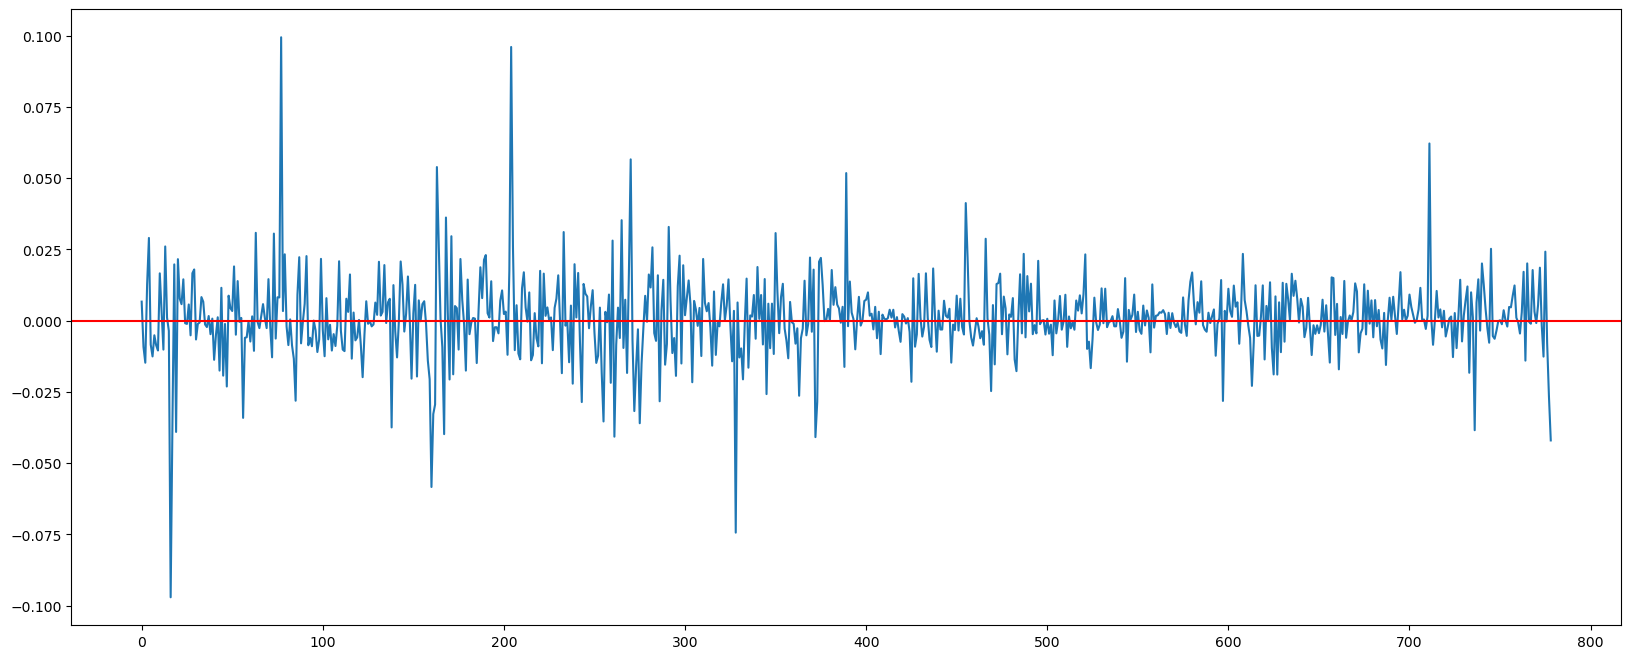

In [12]:
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

### Steps involved in testing a claim by hypothesis testing

#### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0

H1 means the average stock return is not equal to 0

#### Step 2: Calculate test statistic

In [17]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


#### Step 3: Set desicion criteria

In [19]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


#### Step 4:  Make decision - shall we reject H0?

In [21]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


### One tail test

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [24]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


** Expected output: ** 1.6141477140003675

In [26]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


** Expected output: ** 1.64485362695

In [28]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


** Expected output: ** At significant level of 0.05, shall we reject: False

### Using alternative method: p-value

In [31]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [32]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False


# 3) Building a Simple Trading Strategy 

### 1. Munging the stock data and adding two columns - MA10 and MA50

In [35]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.read_csv('facebook.csv')
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
49,2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
50,2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
51,2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
52,2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
53,2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


### 2. Adding "Shares" column to make decisions base on the strategy 

In [37]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

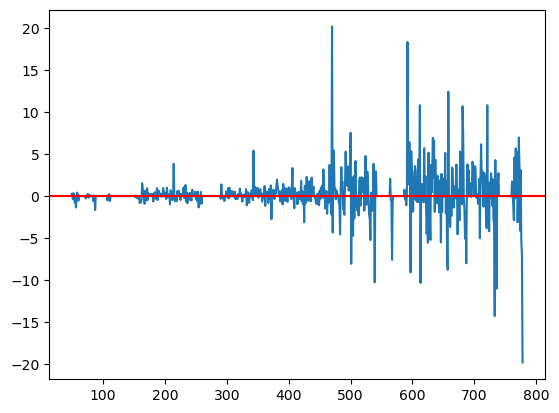

In [38]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [40]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

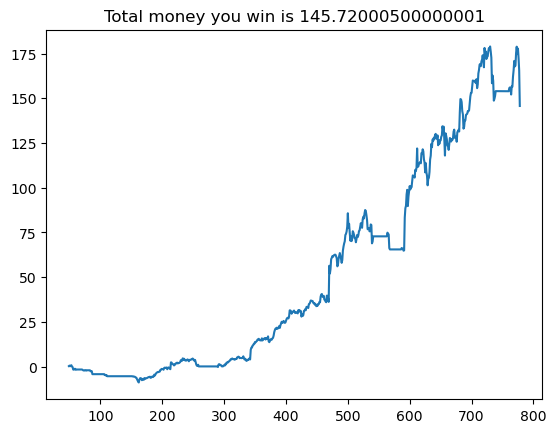

In [41]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

## Simple trading strategy for Microsoft data (microsoft.csv).

In [43]:
ms = pd.read_csv('microsoft.csv')

In [44]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [45]:
ms['Close1'] = ms['Close'].shift(-1)
ms['PriceDiff'] = ms['Close1'] - ms['Close']

In [46]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000


In [47]:
ms['MA 10'] = ms['Close'].rolling(10).mean()
ms['MA 50'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()

In [48]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,MA 10,MA 50
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,41.560001,0.180000,42.495,44.0034
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,41.700001,0.140000,42.263,43.9056
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.500000,0.799999,42.105,43.8044
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.290001,-0.209999,42.049,43.7278
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,42.880001,0.590000,41.967,43.6606


In [49]:
ms.set_index(ms['Date'])

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,MA 10,MA 50
Date,,,,,,,,,,,
2015-03-13,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,41.560001,0.180000,42.495,44.0034
2015-03-16,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,41.700001,0.140000,42.263,43.9056
2015-03-17,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.500000,0.799999,42.105,43.8044
2015-03-18,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.290001,-0.209999,42.049,43.7278
2015-03-19,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,42.880001,0.590000,41.967,43.6606
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-29,2018-01-29,95.139999,95.449997,93.720001,93.919998,93.480873,31569900,92.739998,-1.180000,91.423,86.3292
2018-01-30,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,95.010002,2.270004,91.862,86.5244
2018-01-31,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,94.260002,-0.750000,92.349,86.7606


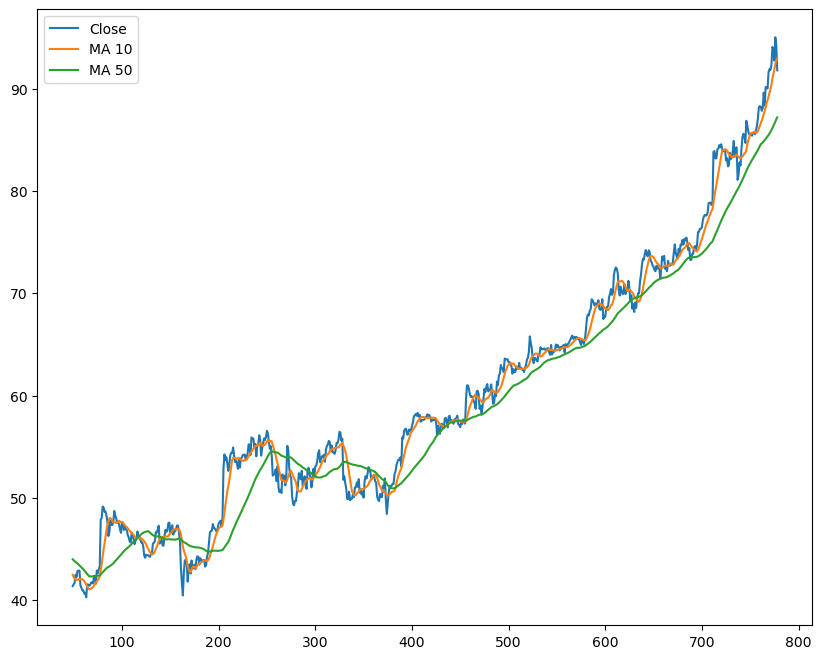

In [50]:
plt.figure(figsize = (10,8))
ms['Close'].plot()
ms['MA 10'].plot()
ms['MA 50'].plot()
plt.legend()

In [51]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,MA 10,MA 50
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,41.560001,0.180000,42.495,44.0034
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,41.700001,0.140000,42.263,43.9056
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.500000,0.799999,42.105,43.8044
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.290001,-0.209999,42.049,43.7278
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,42.880001,0.590000,41.967,43.6606


In [52]:
ms['shares'] = [1 if ms.loc[a,'MA 10'] > ms.loc[a,'MA 50'] else 0 for a in ms.index]
#fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

In [53]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,MA 10,MA 50,shares
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,41.560001,0.180000,42.495,44.0034,0
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,41.700001,0.140000,42.263,43.9056,0
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.500000,0.799999,42.105,43.8044,0
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.290001,-0.209999,42.049,43.7278,0
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,42.880001,0.590000,41.967,43.6606,0


In [54]:
ms['Profit'] = [ms.loc[a,'Close1'] - ms.loc[a,'Close'] if ms.loc[a,'shares'] == 1 else 0 for a in ms.index]

In [55]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,MA 10,MA 50,shares,Profit
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,41.560001,0.180000,42.495,44.0034,0,0.0
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,41.700001,0.140000,42.263,43.9056,0,0.0
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.500000,0.799999,42.105,43.8044,0,0.0
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.290001,-0.209999,42.049,43.7278,0,0.0
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,42.880001,0.590000,41.967,43.6606,0,0.0


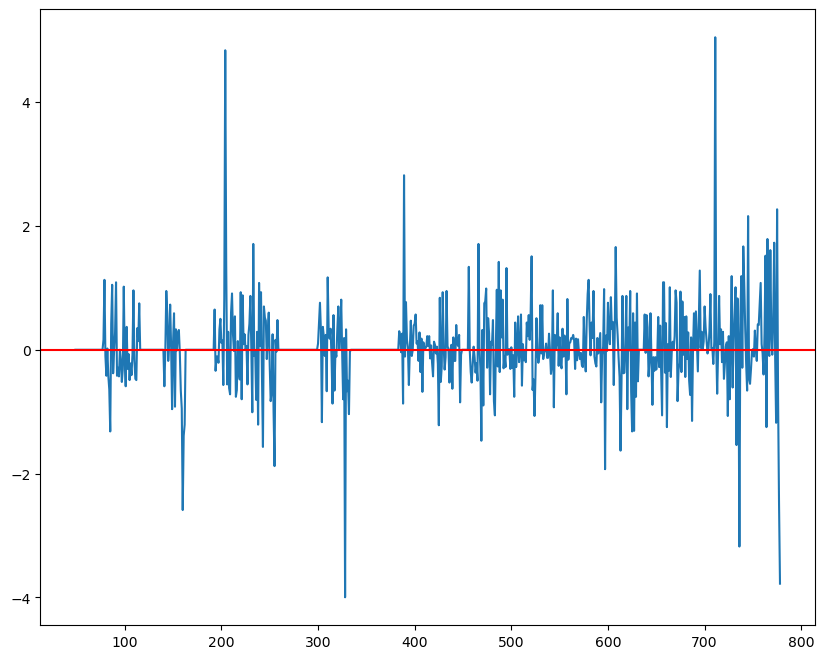

In [56]:
plt.figure(figsize = (10,8))
ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [57]:
ms['Wealth'] = ms['Profit'].cumsum()

In [58]:
ms.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,MA 10,MA 50,shares,Profit,Wealth
774,2018-01-29,95.139999,95.449997,93.720001,93.919998,93.480873,31569900,92.739998,-1.180000,91.423,86.3292,1,-1.180000,28.270005
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,95.010002,2.270004,91.862,86.5244,1,2.270004,30.540009
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,94.260002,-0.750000,92.349,86.7606,1,-0.750000,29.790009
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,91.779999,-2.480003,92.765,86.9978,1,-2.480003,27.310006
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,88.000000,-3.779999,92.943,87.1828,1,-3.779999,23.530007


# 4) Model of Stock Return

In [60]:
ms = pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Distribution of Log return

In [62]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

In [63]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


In [64]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


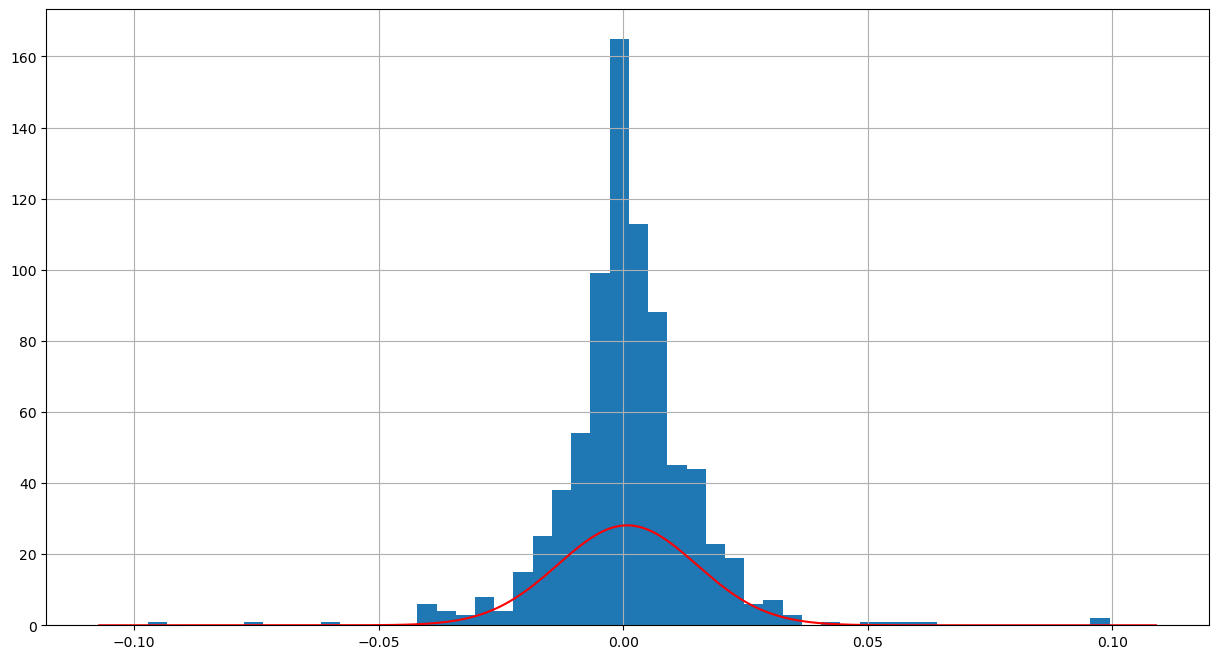

In [65]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [67]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [68]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  6.056775634858521e-13


**Expected Output: ** The Probability is  6.05677563486e-13

## Calculate the probability of the stock price will drop over a certain percentage in a year

In [71]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [72]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.20, mu220,sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.03535237727490905


**Expected Output: ** The probability of dropping over 20% in 220 days is  0.0353523772749

# 5) Calculate Value at risk (VaR)

In [75]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [76]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [77]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25,mu,sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75,mu,sigma)
print('75% quantile ', q75)

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006


**Expected Output: ** 25% quantile  -0.00875205783841
75% quantile  0.0103925208107

### Conclusion

The moving average trading strategy provides a basic yet insightful approach to identifying buy and sell signals in stock trading.
While the strategy is simple to implement and understand, its effectiveness heavily depends on the chosen parameters for moving averages
and the nature of the stock or index being analyzed. Further enhancements, such as dynamic parameter optimization or incorporating additional
indicators, could improve the strategy's performance. Overall, this project highlights the utility of moving averages in trading strategies and serves as a foundation for more complex systems.
